## 💹💲Moody's와 Morningstar 주가 1994-2024
무디스(1994~2023)와 모닝스타(2005~2024) 주가

1. histogram
   1. 전체 / 개별
2. bar
3. scatter
4. seasonal plot
   1. subplot
   2. fig, axes
5. figure
   1. plot
   2. histplot

In [2]:
#%conda install statsmodels.tsa.seasonal
#%conda install matplotlib
#%conda install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/home/leejieun/workspace/kaggle-notebooks/datasets/kapturovalexander/moodys-share-prices-from-1994-till-april-2023/Moodys.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-11-01,8.3125,8.3125,8.1875,8.2500,6.565471,2176400
1,1994-11-02,8.2500,8.2500,8.1875,8.1875,6.515731,2348200
2,1994-11-03,8.1875,8.2500,8.1250,8.1875,6.515731,2060800
3,1994-11-04,8.1875,8.2500,8.1250,8.1250,6.465993,2663800
4,1994-11-07,8.0625,8.0625,8.0000,8.0625,6.416255,1049400


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7160 non-null   object 
 1   Open       7160 non-null   float64
 2   High       7160 non-null   float64
 3   Low        7160 non-null   float64
 4   Close      7160 non-null   float64
 5   Adj Close  7160 non-null   float64
 6   Volume     7160 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 391.7+ KB


In [7]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-11-01,8.312500,8.312500,8.187500,8.250000,6.565471,2176400
1,1994-11-02,8.250000,8.250000,8.187500,8.187500,6.515731,2348200
2,1994-11-03,8.187500,8.250000,8.125000,8.187500,6.515731,2060800
3,1994-11-04,8.187500,8.250000,8.125000,8.125000,6.465993,2663800
4,1994-11-07,8.062500,8.062500,8.000000,8.062500,6.416255,1049400
...,...,...,...,...,...,...,...
7155,2023-04-04,305.970001,310.290009,302.390015,303.940002,303.940002,743400
7156,2023-04-05,303.230011,304.040009,300.279999,302.850006,302.850006,584200
7157,2023-04-06,302.019989,302.839996,296.160004,298.619995,298.619995,564500
7158,2023-04-10,295.079987,296.769989,290.980011,295.660004,295.660004,492600


In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Date 컬럼의 구간 지정

In [10]:
mask = ('2022-01-01'< df['Date']) & (df['Date']< '2022-12-31')
df[mask]

,Date,Open,High,Low,Close,Adj Close,Volume
6841,2022-01-03,391.739990,392.529999,380.559998,383.589996,379.054626,639300
6842,2022-01-04,385.440002,388.010010,382.089996,386.269989,381.702911,528600
6843,2022-01-05,386.670013,388.230011,377.000000,377.049988,372.591919,559500
6844,2022-01-06,375.320007,376.769989,368.269989,374.619995,370.190674,853600
6845,2022-01-07,374.339996,375.079987,370.630005,372.399994,367.996918,504500
...,...,...,...,...,...,...,...
7087,2022-12-23,278.390015,280.630005,276.869995,278.820007,278.090790,320600
7088,2022-12-27,277.829987,278.920013,275.200012,276.359985,275.637207,424700
7089,2022-12-28,276.239990,279.350006,272.700012,273.019989,272.305939,395700
7090,2022-12-29,276.000000,283.079987,275.730011,282.929993,282.190033,316700


### 컬럼별 히스토그램 생성
- bins: 변수의 범위를 나타내는 막대의 수
- figsize: 그래프 크기

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

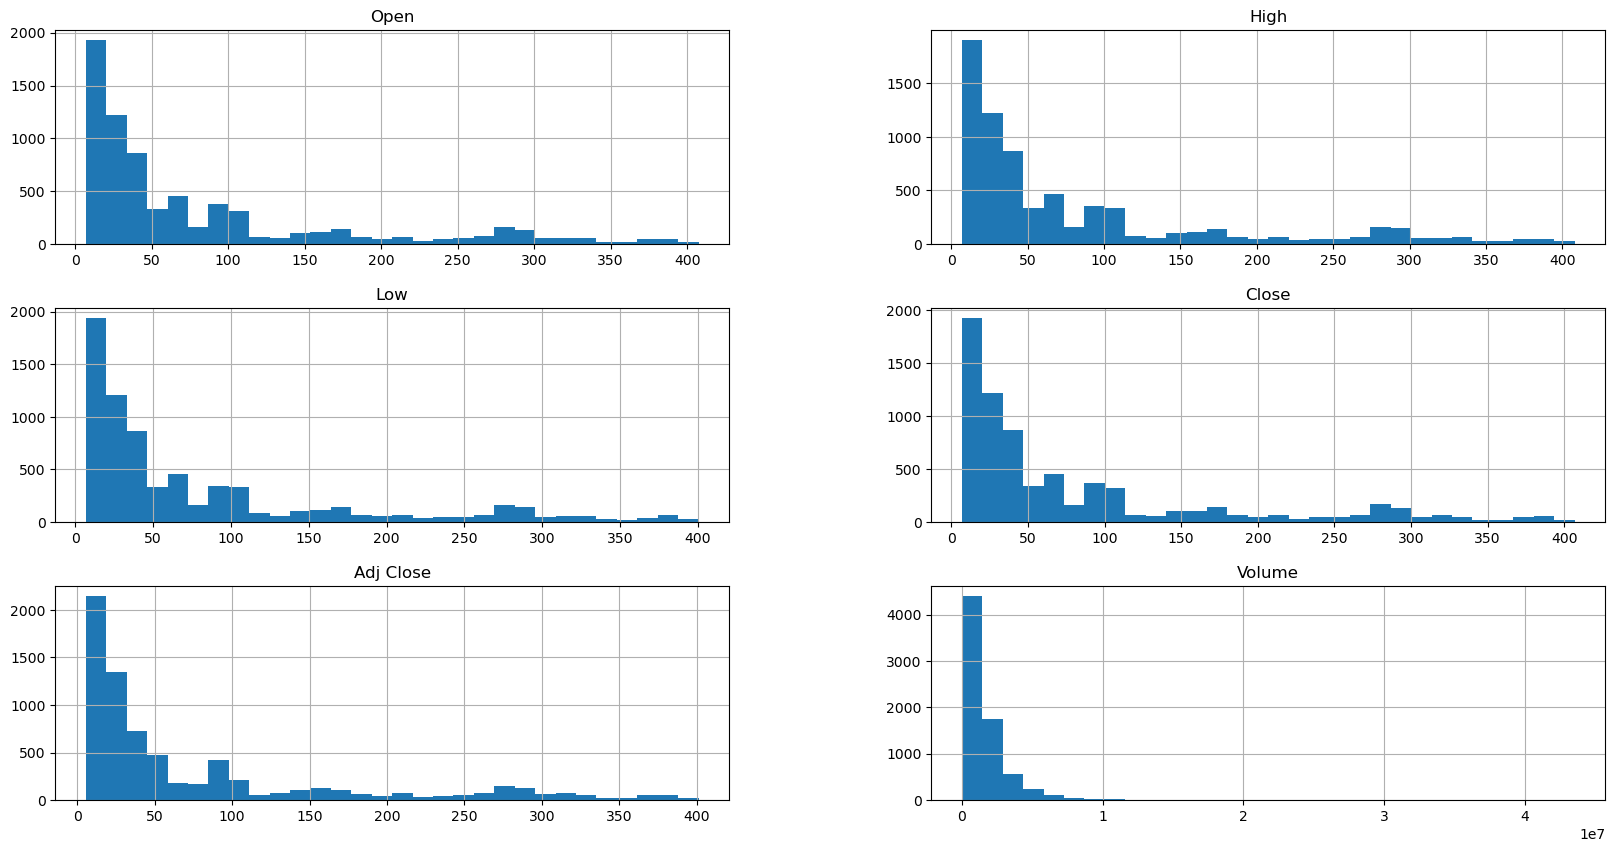

In [11]:
df.hist(bins=30, figsize=(20,10))

### 개별 히스토그램

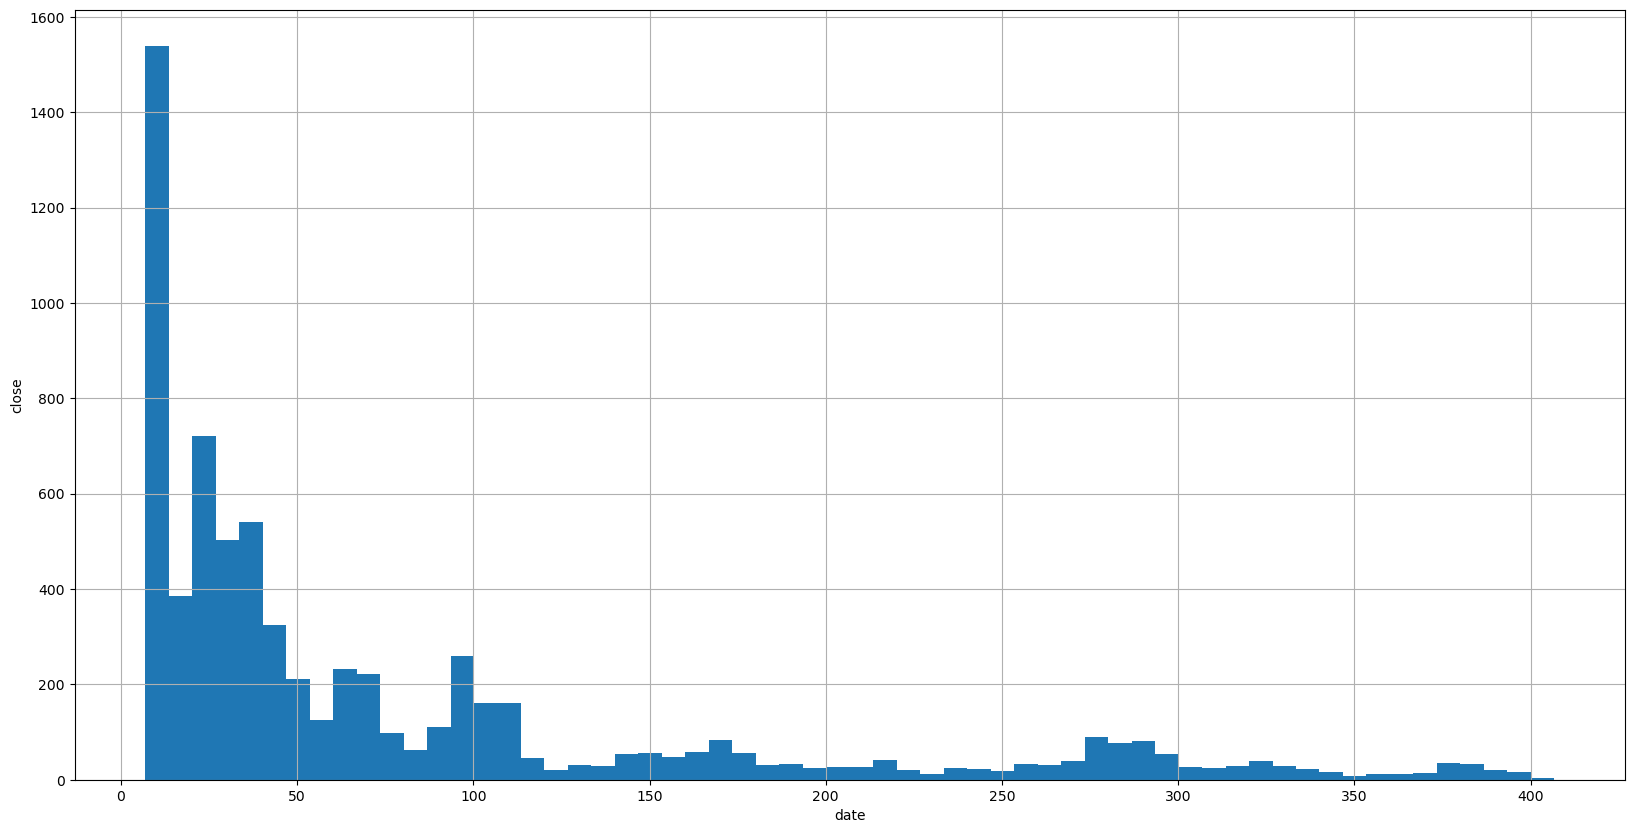

In [12]:
df['Close'].hist(figsize=(20,10), bins=60)
plt.xlabel('date')
plt.ylabel('close')
plt.show()

### 기본 선형 그래프

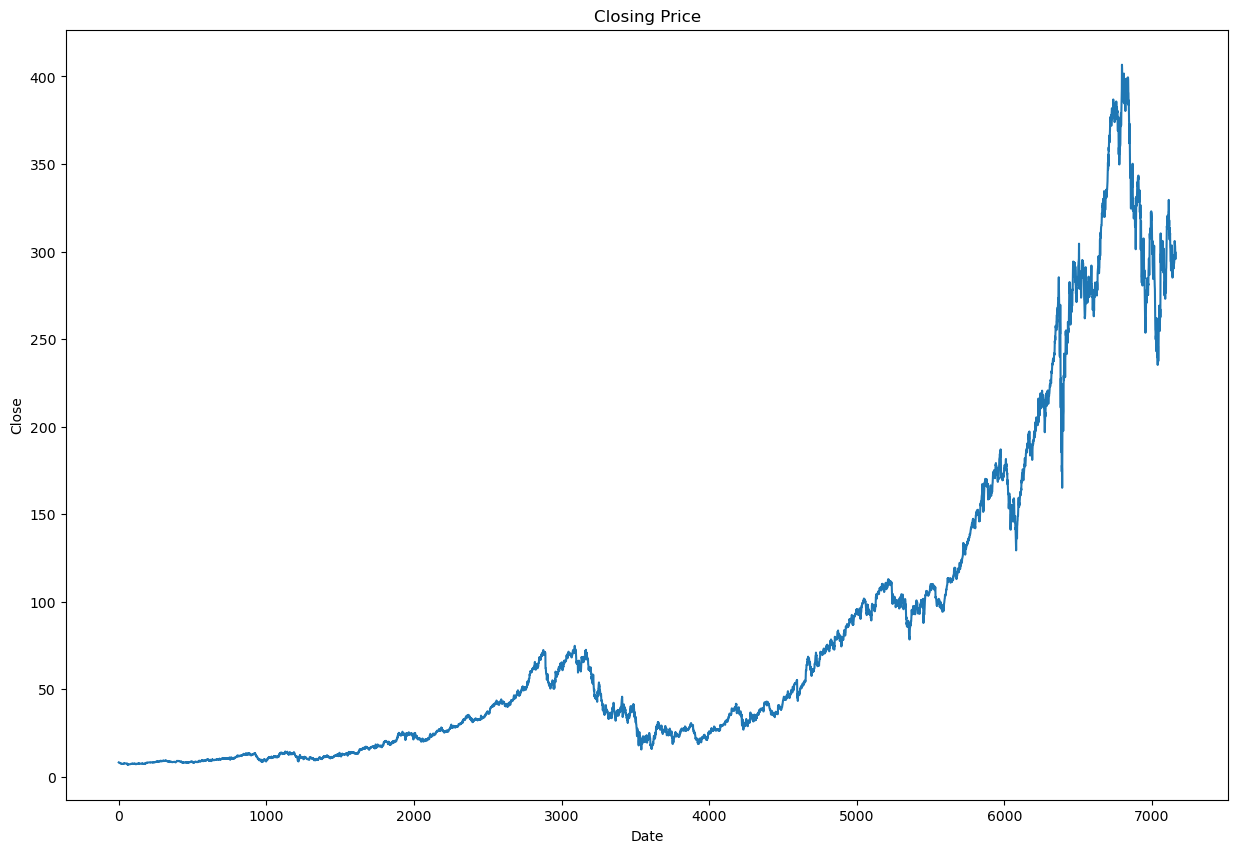

In [13]:
plt.figure(figsize=(15,10))
plt.plot(df['Close'])
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

### 산점도

<Axes: xlabel='Date', ylabel='Volume'>

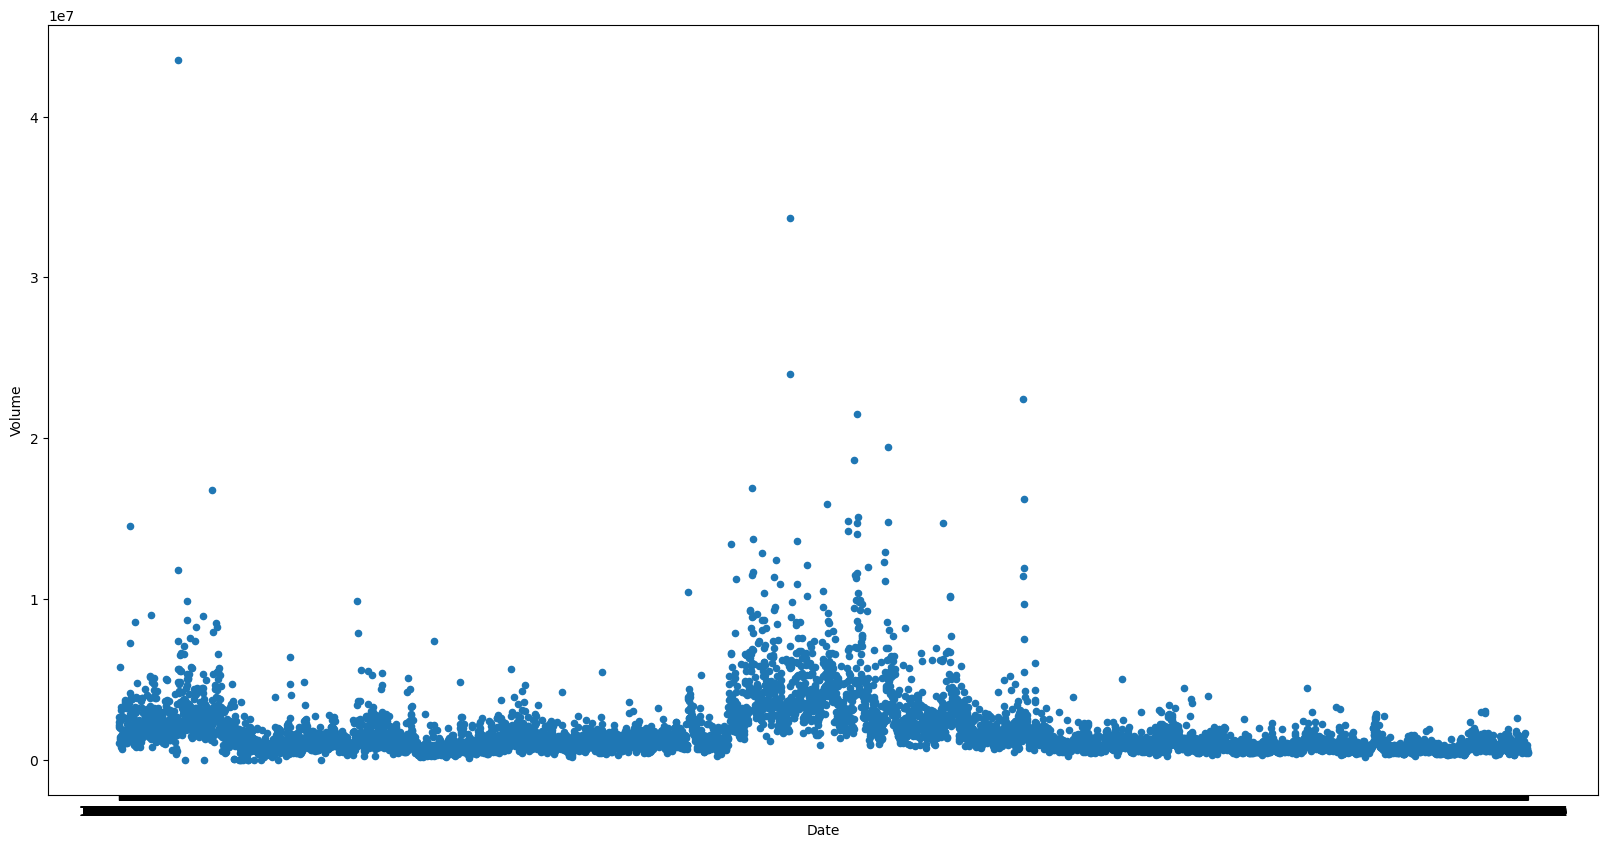

In [14]:
df.plot(kind='scatter', x='Date', y='Volume', figsize=(20,10))

### 개별 선형 그래프 

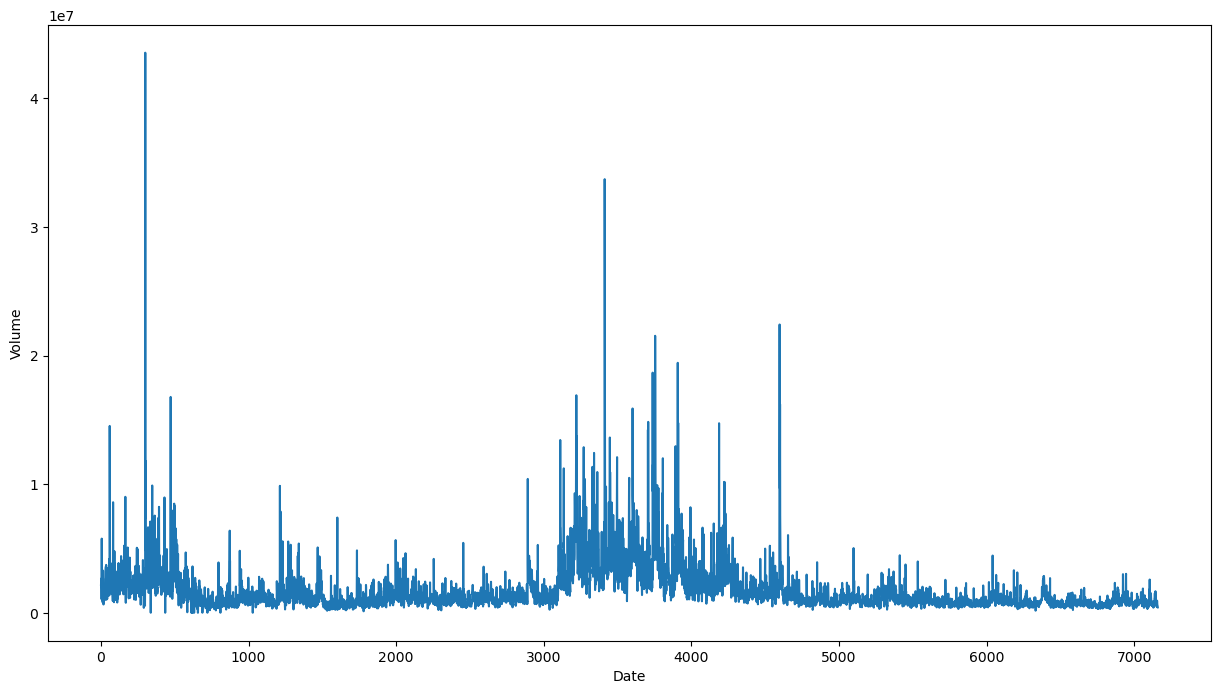

In [39]:
plt.figure(figsize=(15,8))
plt.plot(df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [16]:
df['Daily Return'] = df['Close'].pct_change() # 행과 행 차이를 현재 값과의 백분율로 변경

In [40]:
df['Daily Return'].dropna() # 결측값 제거

1      -0.007576
2       0.000000
3      -0.007634
4      -0.007692
5      -0.023256
          ...   
7155   -0.001183
7156   -0.003586
7157   -0.013967
7158   -0.009912
7159    0.012379
Name: Daily Return, Length: 7159, dtype: float64

### 개별 히스토그램
- kde=True : 상대적 비율을 부드럽게 표현

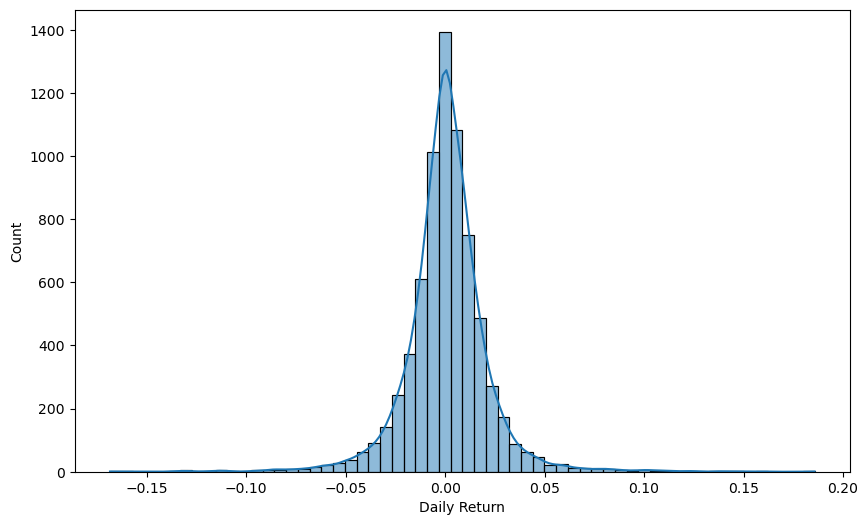

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(df['Daily Return'], kde=True, bins=60)
plt.xlabel('Daily Return')
plt.ylabel('Count')
plt.show()

### 이동평균 계산
- SMA 50, 200: 50, 200일간의 주가 이동평균선

In [19]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

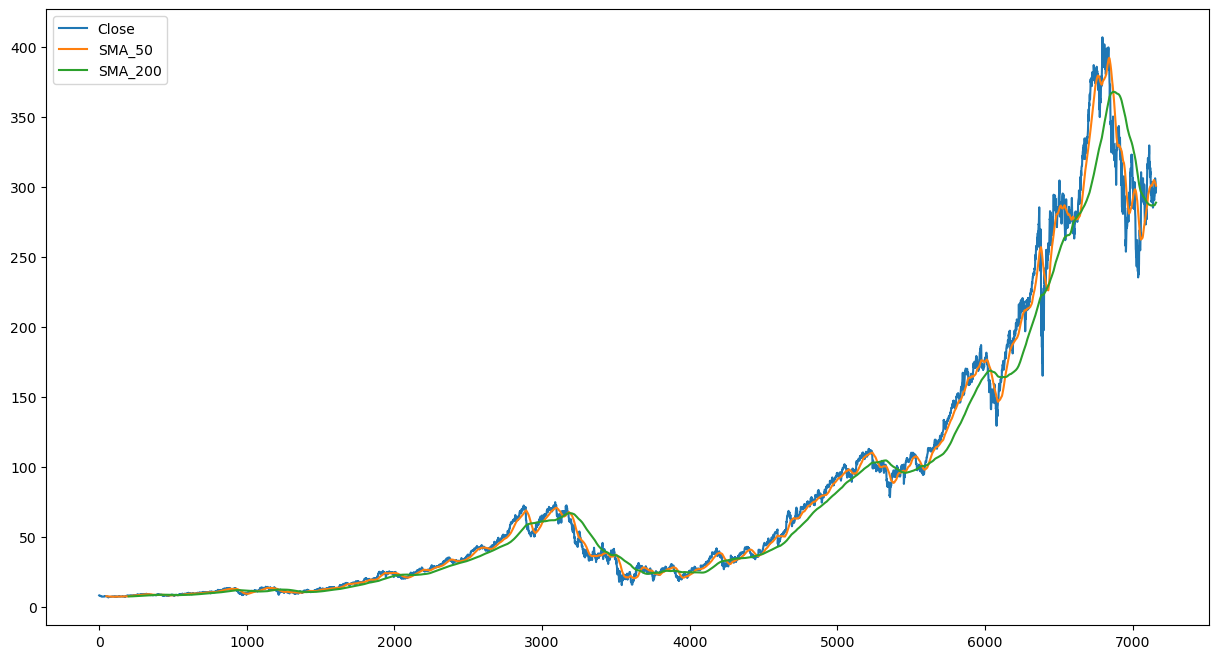

In [20]:
plt.figure(figsize=(15,8))
plt.plot(df['Close'], label='Close')
plt.plot(df['SMA_50'], label='SMA_50')
plt.plot(df['SMA_200'], label='SMA_200')
plt.legend()
plt.show()

### 시계열 데이터 분해
- 추세, 계절, 잔여 데이터

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

Additive decomposition(덧셈 분해): 시간이 지남에 따라 변동폭이 일정하다. 

In [42]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=300) # additive: 시간의 변화에 변동폭이 일정한 경우
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

subplot 사용
- 그래프마다 행,열 등 속성을 정해줘야 하는 복잡성

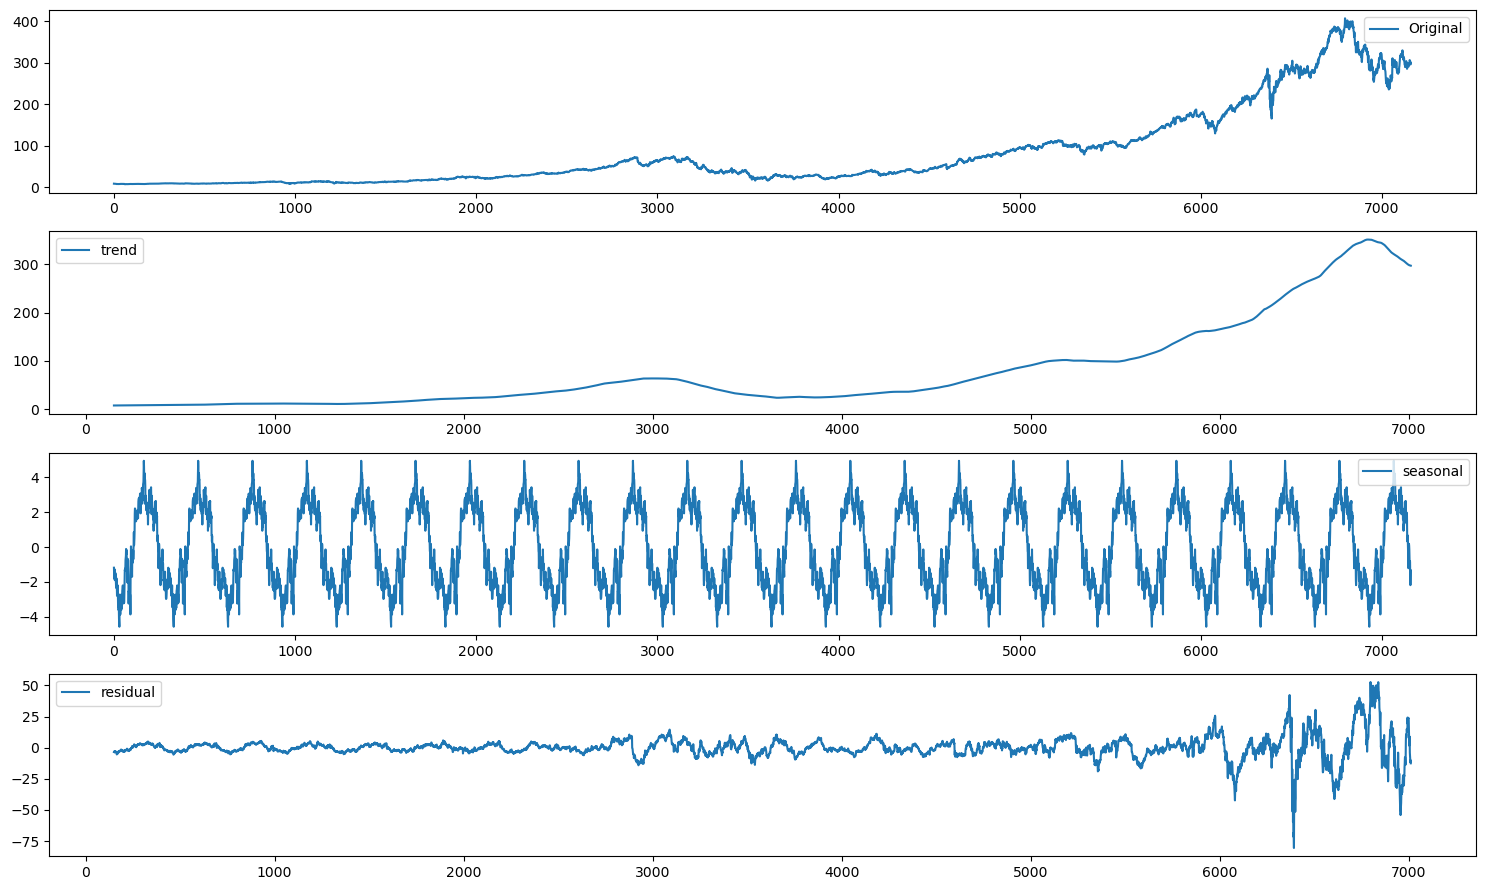

In [44]:
plt.figure(figsize=(15,9))

plt.subplot(411) # (행, 열, 인덱스)
plt.plot(df['Close'], label='Original')
plt.legend()

plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend()

plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend()
plt.tight_layout()

plt.show()

subplots 사용
- 행, 열을 한 줄로 정의할 수 있고, 각 그래프를 인덱스 번호로 사용한다
  - fig: Figure 의 줄임, 그래프의 프레임
  - axes: 각 데이터를 그래프로 그리는 부분

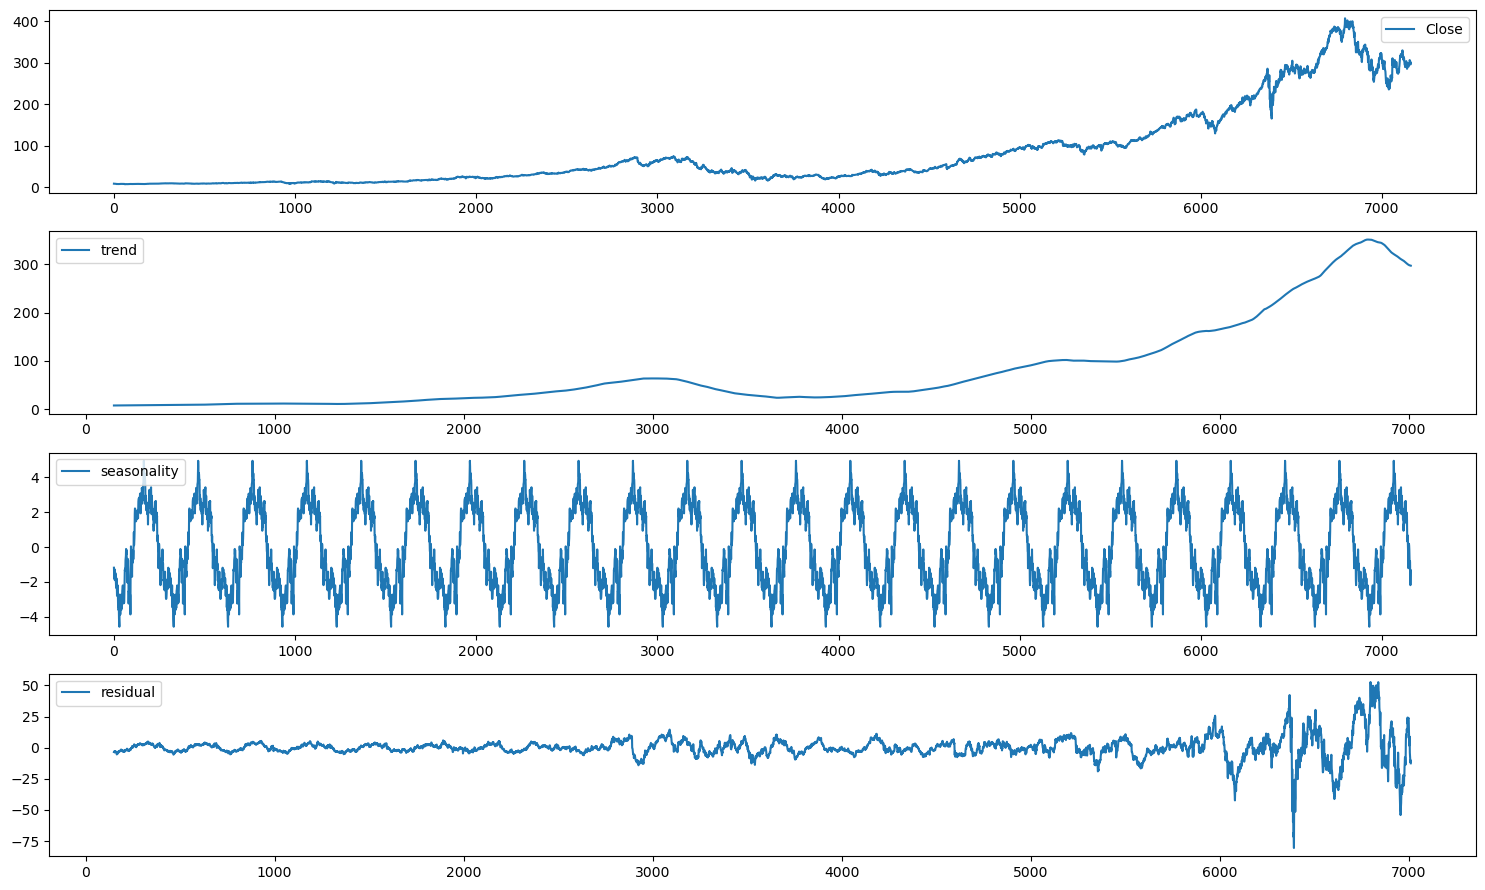

In [36]:
fig, axes = plt.subplots(4, 1, figsize=(15,9))
axes[0].plot(df['Close'], label='Close')
axes[1].plot(trend, label='trend')
axes[2].plot(seasonal, label='seasonality')
axes[3].plot(residual, label='residual')
for axs in axes:
    axs.legend()
plt.tight_layout()
plt.show()

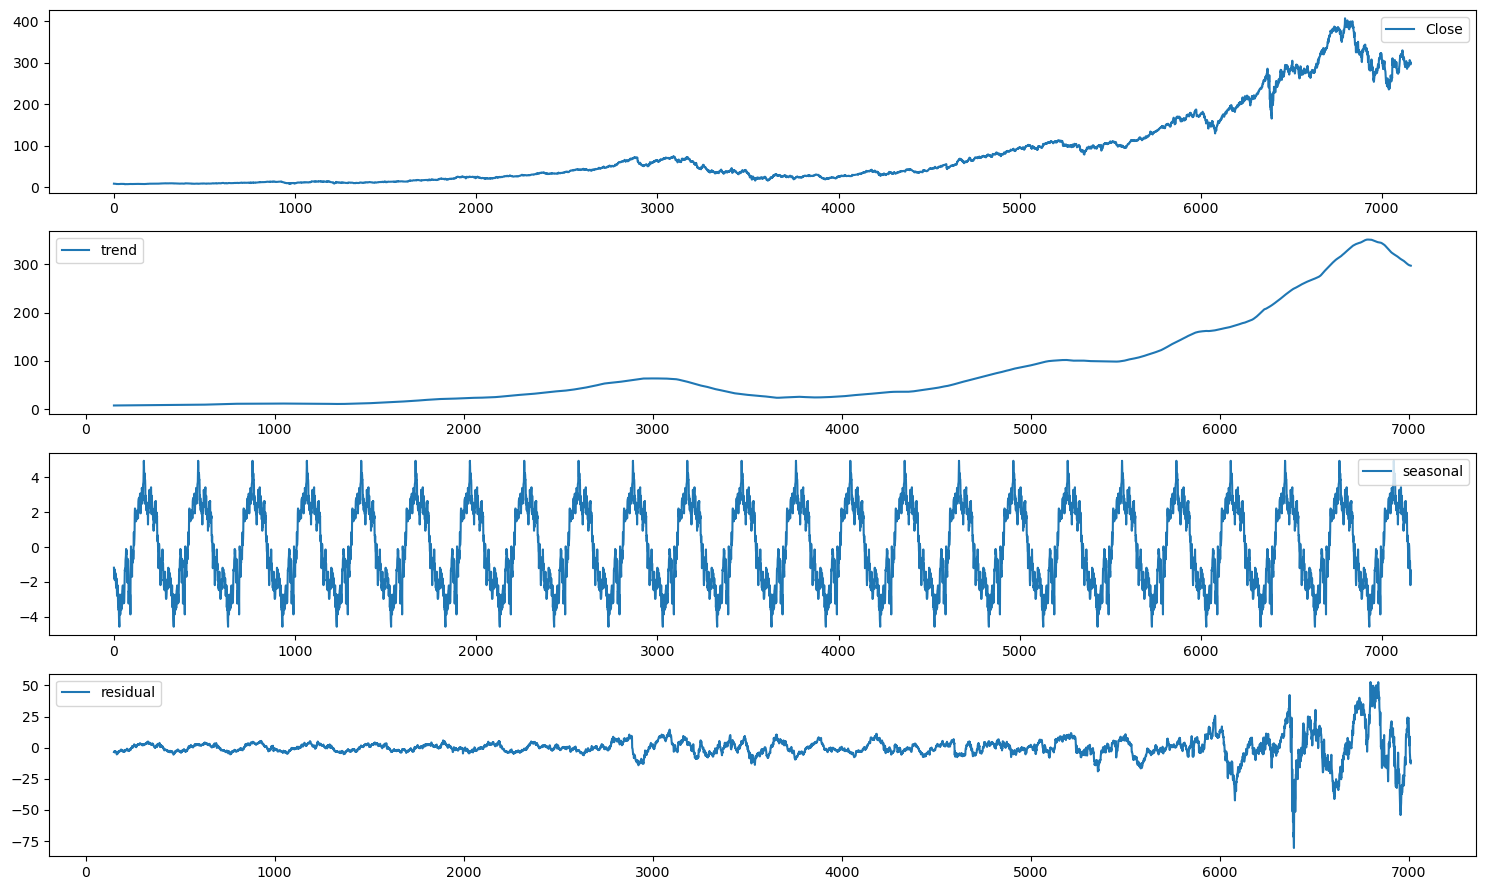

In [37]:
fig, axes = plt.subplots(4,1,figsize=(15,9))
axes[0].plot(df['Close'], label='Close')
axes[1].plot(trend, label='trend')
axes[2].plot(seasonal, label='seasonal')
axes[3].plot(residual, label='residual')
for axs in axes:
    axs.legend()
plt.tight_layout()
plt.show()